# Sprint7課題 機械学習スクラッチクラスタリング

## 2.スクラッチによる実装

In [1]:
#シンプルデータセット3の用意
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

## 【問題1】K-meansクラスの作成

In [29]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchKMeans:
    def __init__(self, n_iter=300, new_centroids=False):
        self.n_iter = n_iter
        self.new_centroids = new_centroids


    def _distance(self, centroids, point):
        distance = np.zeros((len(centroids), ))
        for i in range(len(centroids)):
            distance[i] = np.linalg.norm(centroids[i] - point)
        return distance

    def fit(self, X, k=4, n_iters=300):
        X_size, num_features = X.shape

        #重心の初期値をランダムにk個選択
        centroids = X[np.random.choice(X_size, k)]

        #各データのクラスタを保存する配列
        cluster = np.zeros(X_size)

        #更新前後の重心を比較するため、新しい重心を格納する配列を用意
        self.new_centroids = np.zeros((k, num_features))


        for i in range(self.n_iter):
            for j in range(X_size):
                #重心との距離を算出
                distances = self._distance(centroids, X[j])
                
                #各データのクラスタを更新
                cluster[j] = np.argsort(distances)[0]
                
            #重心の再計算
            for m in range(k):
                self.new_centroids[m] = X[cluster==m].mean(axis=0)

            
        return cluster

    def SSE(self, X, k):
        sse_sum = np.zeros((X.shape[0],))
        for i in range(1,k+1):
            self.fit(X, k=i)
            for j in range(X.shape[0]):
                sse = np.sum((self.new_centroids - X[j]) ** 2, axis=1)
                sse_sum[j] = np.sort(sse)[0]
            
        return np.sum(sse_sum)


    def scatter(self, X):
        plt.scatter(X[:,0], X[:, 1], c=self.fit(X))

In [101]:
kmeans = ScratchKMeans()

In [102]:
kmeans.fit(X, k=4, n_iters=300)

array([3., 1., 3., 3., 3., 3., 2., 1., 3., 1., 1., 1., 1., 1., 1., 0., 0.,
       2., 2., 0., 3., 1., 2., 0., 3., 2., 2., 3., 0., 0., 0., 1., 0., 0.,
       2., 3., 1., 0., 1., 2., 3., 2., 1., 2., 2., 1., 0., 2., 3., 3., 3.,
       0., 2., 2., 2., 1., 1., 0., 0., 1., 1., 0., 0., 3., 0., 1., 2., 2.,
       0., 3., 1., 0., 3., 1., 3., 3., 2., 2., 0., 0., 0., 1., 2., 3., 0.,
       2., 0., 0., 3., 3., 3., 2., 3., 2., 2., 1., 1., 2., 1., 3.])

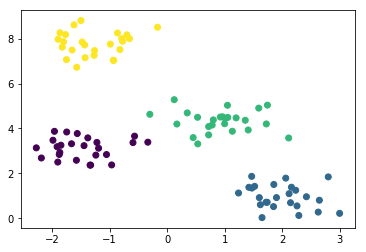

In [103]:
kmeans.scatter(X)

In [107]:
import pickle

with open('model.pickle', mode='wb') as fp:
    pickle.dump(kmeans, fp, protocol=2)

## 【問題2】エルボー法の実装

In [62]:
sse = np.zeros((10,))

for i in range(10):
    sse[i] = kmeans.SSE(X, k=i+1)

print(sse)

/Users/clouds_kimura/anaconda3/envs/pythonml/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.


[870.26117979 479.41808385 167.64193326  54.34688031  81.30016624
  61.70687616 127.60450923  34.81127844  56.9982227   27.92293061]


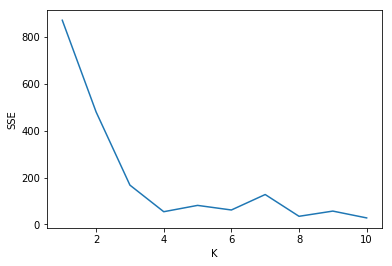

In [106]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range(1, 11), sse)

## 【問題3】（アドバンス課題）シルエット図

## 3.クラスタリング分析

In [131]:
import pandas as pd
import numpy as np

df = pd.read_csv('Wholesale customers data.csv')
df_data = df.drop(['Channel', 'Region'], axis=1)

In [170]:
df_data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [132]:
df_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_data)
data_pca = pca.transform(df_data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


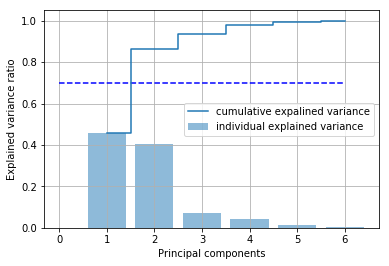

In [121]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# pca = PCA(n_components=None)
# pca = pca.fit(df_data)
# var_exp = pca.explained_variance_ratio_
# cum_var_exp = np.cumsum(var_exp)
# print(cum_var_exp)
# plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

## 【問題4】クラスタ数kの選択

In [266]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=1).fit(data_pca)
cluster = km.fit_predict(data_pca)

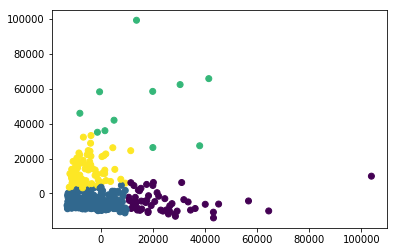

In [267]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster)

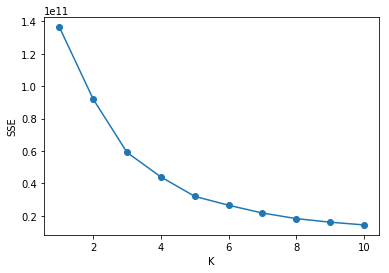

In [236]:
distortions = np.zeros((10,))
for i in range(1, 11):
    km = KMeans(n_clusters=i,  
                max_iter=300, 
                random_state=0)
    km.fit(data_pca)
    distortions[i-1] = km.inertia_

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(range(1,11), distortions, marker='o')

K=4を選択する。  
業種別にグループ分けしていると判断したため。

## 【問題5】既知のグループとの比較

In [260]:
#Channelを抽出
df[['Channel']].values.flatten()

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,

In [261]:
#Regionを抽出
df[['Region']].values.flatten()

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,

No handles with labels found to put in legend.


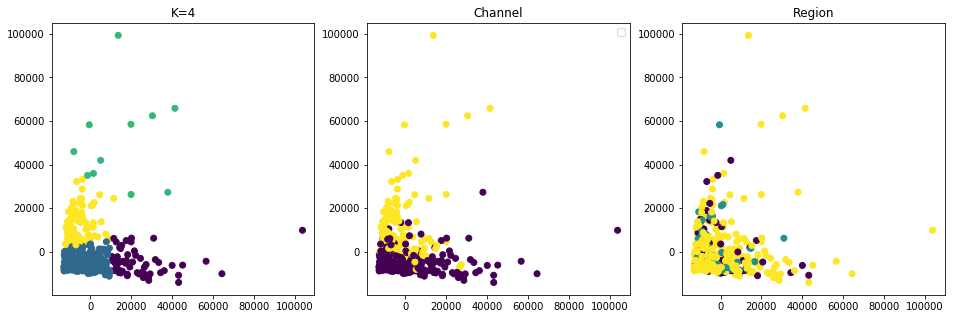

In [313]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(16, 5))
plt.subplot(1,3,1)
plt.title('K=4')
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster)

plt.subplot(1,3,2)
plt.title('Channel')
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df[['Channel']].values.flatten())
plt.legend()

plt.subplot(1,3,3)
plt.title('Region')
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df[['Region']].values.flatten())


上記から読み取れることは、新しい特徴量2(ｙ軸)とChannelは2分されている。  
新しい特徴量1,2ともにRegionと関連はなさそう。  

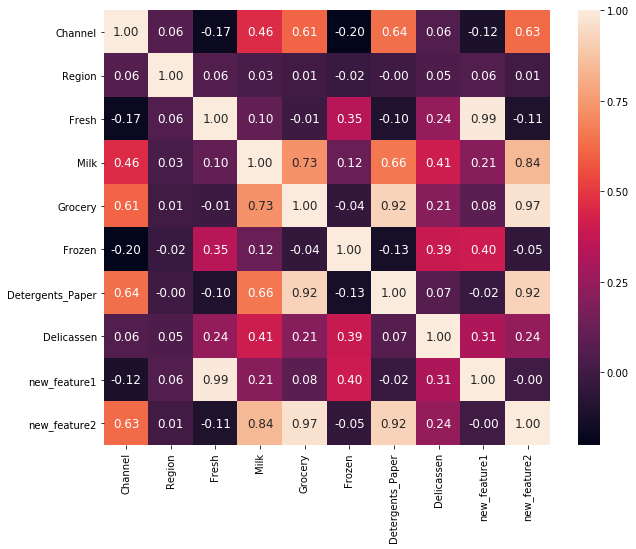

In [299]:
'''
PCAで算出された特徴量と既存の特徴量の相関を見る。
'''
import seaborn as sns

new_df = df.join(pd.DataFrame(data_pca, columns=['new_feature1', 'new_feature2']))

# 特徴量に関する相関係数行列を作る
corr_mat = new_df.corr(method='pearson')

#heatmap作成
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={"size": 12})

Freshとnew_feature1の相関が高く  
new_feature2とGrocery＋Detergents_Paper＋Milkが相関が高い。  
Regionと相関が高いものはなかった。

/Users/clouds_kimura/anaconda3/envs/pythonml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/clouds_kimura/anaconda3/envs/pythonml/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/clouds_kimura/anaconda3/envs/pythonml/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


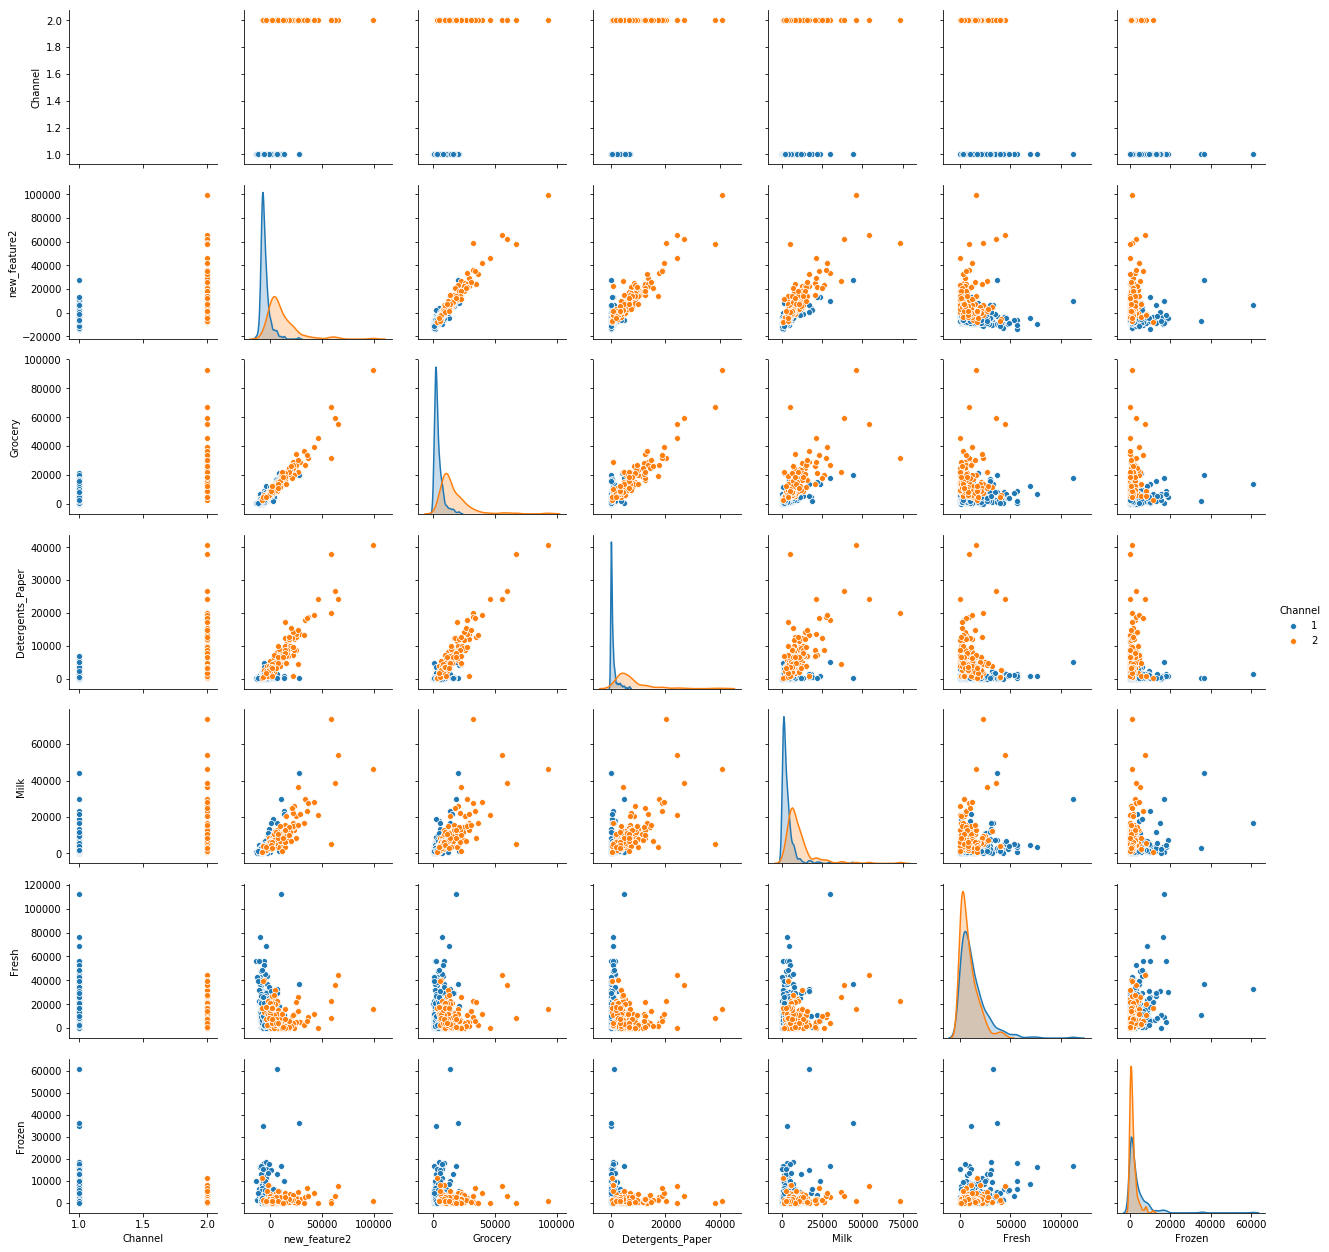

In [318]:
sns.pairplot(new_df[['Channel', 'new_feature2', 'Grocery', 'Detergents_Paper', 'Milk', 'Fresh', 'Frozen']], hue='Channel')

## 【問題6】卸売業者にとって有益な情報

Channelはうまく分割出来ているため、有用な情報になるが、地域差は関係はなし。  
ChannelとDetergents_Paper、Groceryを見ると小売店（channel2）はホテルやレストラン(channel1)を大きく上回っているため、Detergents_Paper、Groceryは小売店に販売することを勧める。  
逆に、FreshやFrozenはホテル、レストランを中心に卸売をすれば良いと判断できる。

## 【問題7】（アドバンス課題）他の手法の調査

## 【問題8】（アドバンス課題）t-SNEとDBSCANの利用

## 【問題9】教師なし学習と教師あり学習

教師あり  
・学習データに正解ラベルを付けて学習する方法
教師なし学習  
・学習データにラベルを付けないで学習する方法